In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import chromedriver_binary
import csv
import re
import japanize_matplotlib

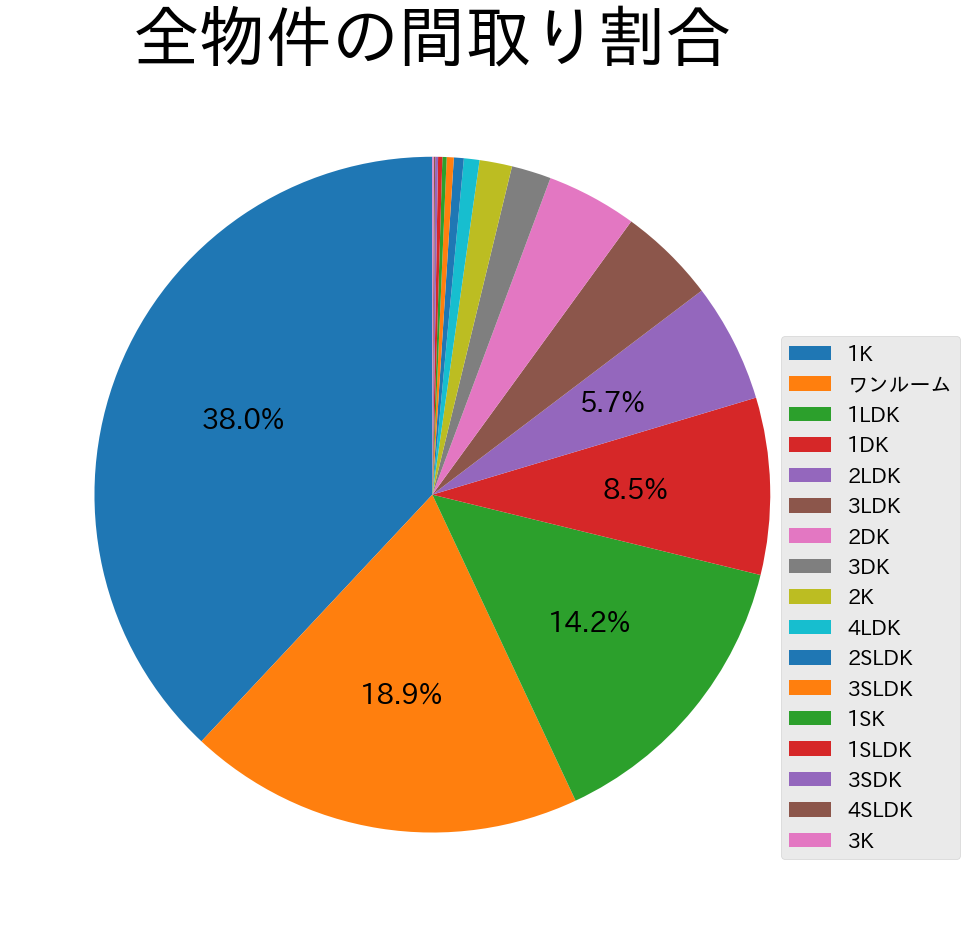

In [2]:
# 間取りの割合
df = pd.read_csv("ふれんず物件スクレイピング情報.csv")
plt.figure(figsize = (10,10))
textprops = {"fontsize":20}

plt.title('全物件の間取り割合',fontsize= 48)
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("tab20").colors)

plt.pie(df["間取り"].value_counts(),
        textprops=textprops,
        autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '',
        startangle=90)
plt.legend(df["間取り"].value_counts().index,
           bbox_to_anchor=(0.9, 0.7))
plt.tight_layout()
plt.savefig("全物件の間取り割合.png")
plt.show()



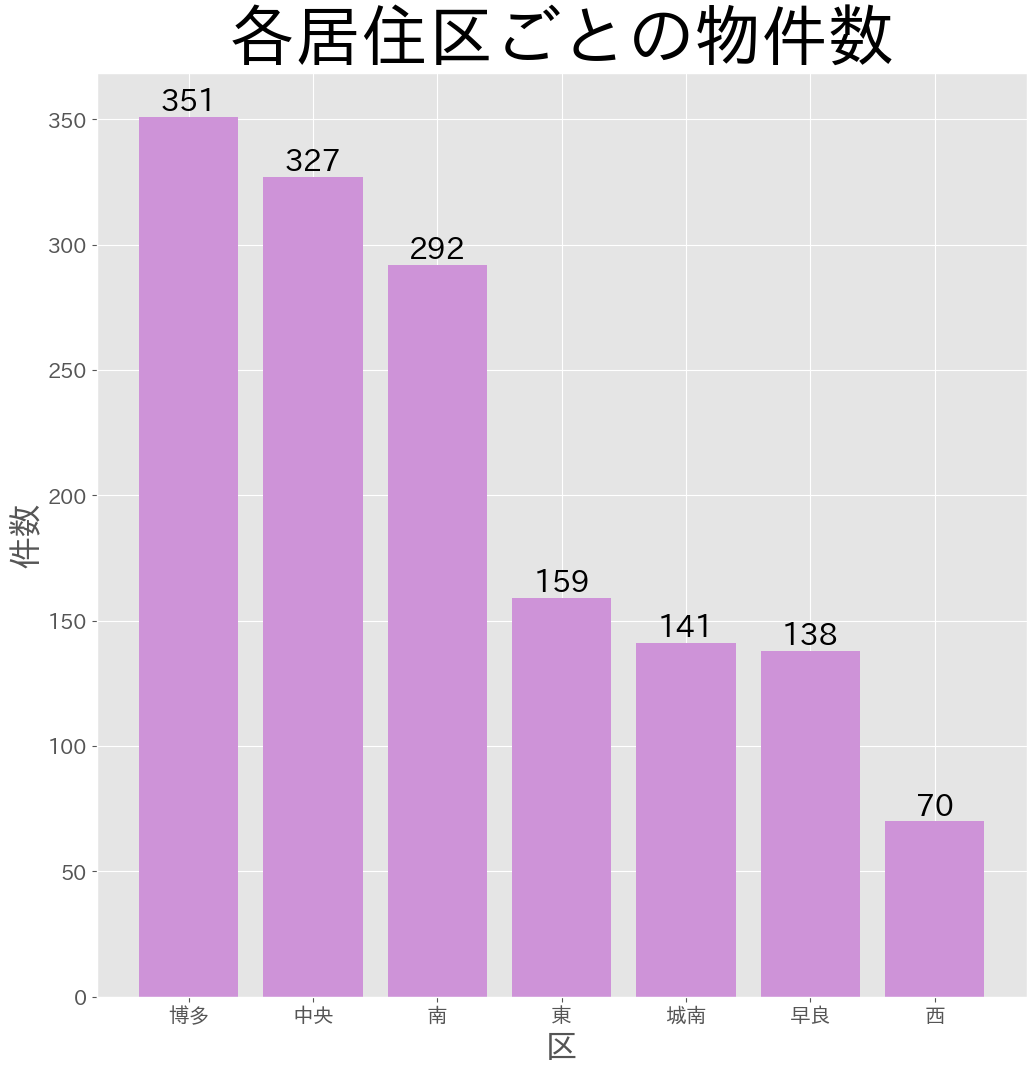

In [3]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")

df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1]) 
plt.style.use('ggplot')

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(12,12))

plt.title('各居住区ごとの物件数',fontsize= 48)
plt.xlabel('区', fontsize= 24)
plt.ylabel('件数', fontsize= 24)

plt.bar(df["市区"].value_counts().index,df["市区"].value_counts(),
        color="#CE93D8")

# 棒グラフ内に数値を書く
for x, y in zip(df["市区"].value_counts().index,df["市区"].value_counts()):
    y = round(y, 2)
    plt.text(x, y, y, ha='center', va='bottom',size = "x-large")
    
plt.savefig("各居住区ごとの物件数.png")
plt.show()


市区
中央    6.067768
南     5.101301
博多    5.738889
城南    4.072695
早良    5.852174
東     5.090755
西     5.072857
Name: 家賃, dtype: float64


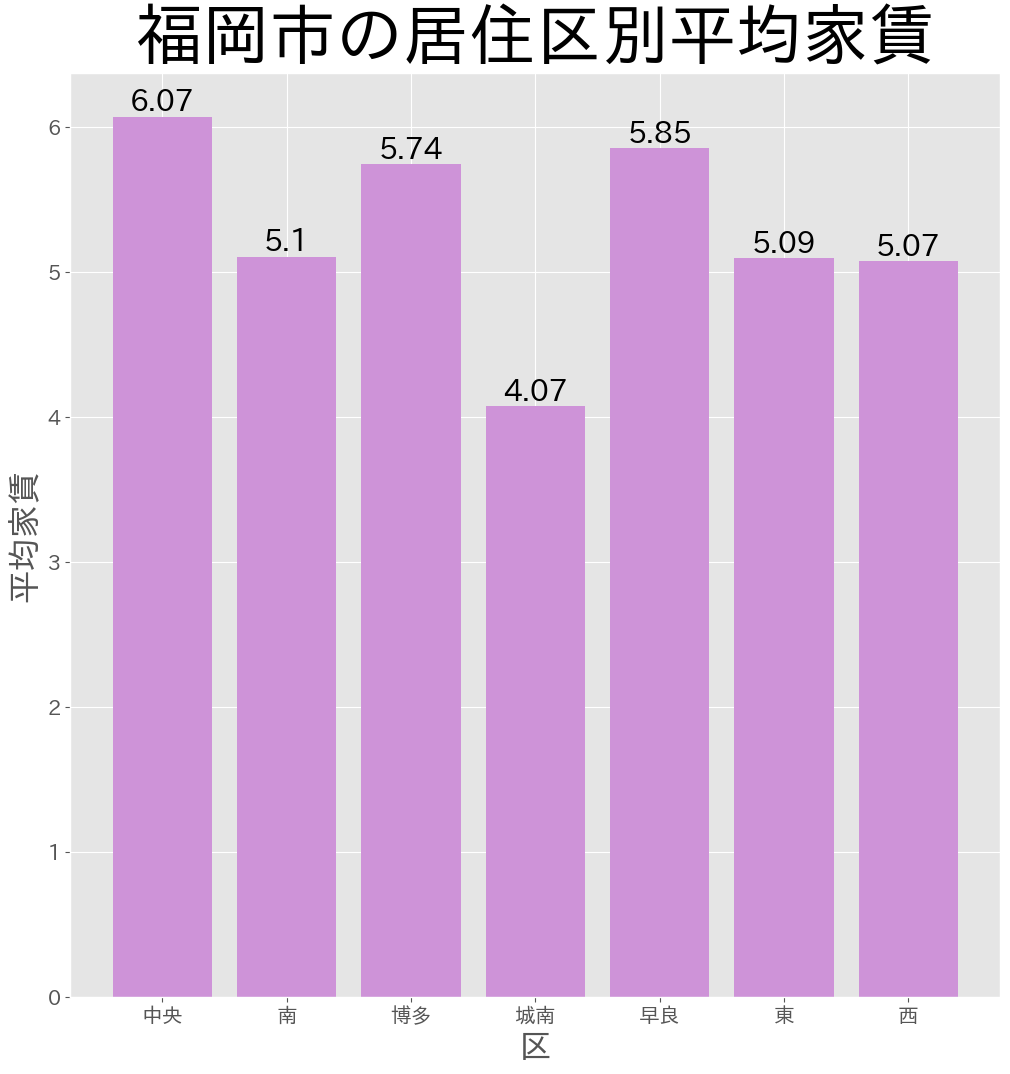

In [4]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1]) 
plt.style.use('ggplot')

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(12,12))

df.sort_values(by="市区",ascending=False)
plt.title('福岡市の居住区別平均家賃',fontsize= 48)
plt.xlabel('区', fontsize= 24)
plt.ylabel('平均家賃', fontsize= 24)
x_label = ["中央","南","博多","城南","早良","東","西"]
plt.bar(x_label,df.groupby("市区").mean()["家賃"],
        color="#CE93D8")


print(df.groupby("市区").mean()["家賃"])

# 棒グラフ内に数値を書く
for x, y in zip(x_label, df.groupby("市区").mean()["家賃"]):
    y = round(y, 2)
    plt.text(x, y, y, ha='center', va='bottom',size = "x-large")

plt.savefig("福岡市の居住区別平均家賃.png")
plt.show()



<Figure size 1200x1200 with 0 Axes>

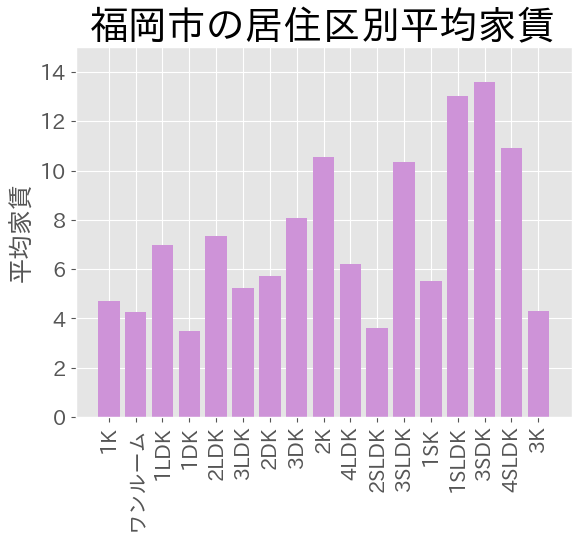

In [5]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1])
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(12,12))

fig, ax1 = plt.subplots()
plt.xticks(rotation=90)
plt.title('福岡市の居住区別平均家賃',fontsize= 28)

ax1.bar(df["間取り"].value_counts().index,df.groupby("間取り").mean()["家賃"],
        color="#CE93D8")              
ax1.set_ylabel('平均家賃')             
ax1.set_ylim(0, 15)

plt.show()

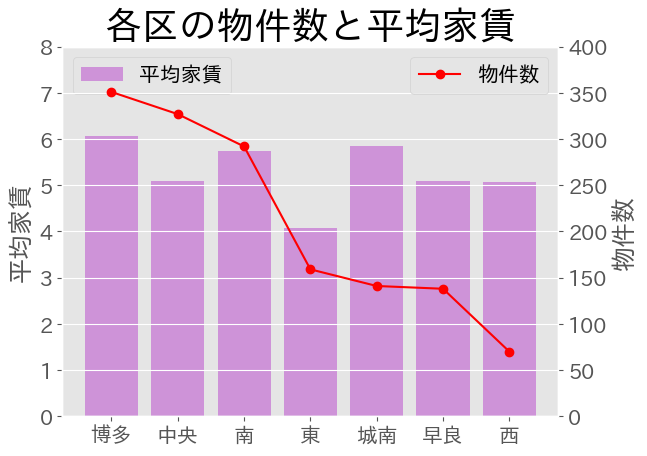

In [6]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1]) 
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})

fig, ax1 = plt.subplots()
plt.title('各区の物件数と平均家賃',fontsize= 27)
ax1.bar(df["市区"].value_counts().index,df.groupby("市区").mean()["家賃"],
        color="#CE93D8")              
ax1.set_ylabel('平均家賃')             
ax1.set_ylim(0, 8)
ax1.legend(['平均家賃'], loc='upper left')

# グラフ２
ax2 = ax1.twinx()
ax2.plot(df["市区"].value_counts().index,df["市区"].value_counts(),'ro-',)
ax2.set_ylabel('物件数')
ax2.legend(['物件数'], loc='upper right')
ax2.set_ylim(0, 400)
ax1.grid()

plt.savefig(".png")
plt.show()

In [7]:
# 募集している区の割合
df = pd.read_csv("RENT.csv")
df['築年'] = df['築年月'].apply(lambda x: re.split('\[', x)[0]) 
plt.style.use('ggplot')

print(df["築年"].value_counts().sort_index)

plt.rcParams.update({'font.size':15})
plt.figure(figsize=(12,12))

<bound method Series.sort_index of 1988    92
2022    80
1990    72
1996    72
1991    62
2006    61
1989    60
1985    56
1997    50
1987    46
2007    45
1986    43
2023    42
1995    40
2005    39
2000    38
1994    35
1992    34
2004    34
1999    34
2001    33
1984    30
1998    30
2002    27
2003    26
2017    22
1979    20
1980    20
2008    20
1978    16
1976    16
1993    16
2014    14
1983    13
2009    13
2020    12
1977    10
2015    10
1981     9
2018     9
2019     8
2016     8
1975     8
2012     7
1973     6
1974     6
2011     6
2013     5
1968     4
1972     4
1982     3
2021     3
2010     2
1969     2
1965     2
1922     1
1961     1
1971     1
Name: 築年, dtype: int64>


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [14]:
# 間取りの割合

# 書き込み
with open('南.csv', 'w') as csv_file:
    fieldnames = ['家賃','物件番号','情報更新日','次回更新予定日','所在地','建物名','沿線・駅・交通','専有面積','専用庭面積','間取り','間取り内訳','バルコニー','サービスルーム数'
                 ,'小学校区','中学校区','駐車場','駐車場：形式','駐車場：状況','駐車場備考','駐車場敷金','敷金','礼金','精算方式','保証金','保証金償却','管理費','共益費'
                 ,'雑費','家賃保証会社','家賃保証・保証費用等','保険','更新料','その他一時金','施設費用','その他費用','賃貸借区分','契約期間','特優賃区分','管理員の勤務形態','敷地延長','建物構造'
                 ,'建物工法','最適用途','階建','階','築年月','現況','入居可能時期','設備','特記事項','備考','取引態様','担当者','担当者連絡先','市区'] # 54
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

df = pd.read_csv("ふれんず物件スクレイピング情報.csv")
plt.figure(figsize = (10,10))
textprops = {"fontsize":20}
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1])
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("tab20").colors)

hakata = []

count = 0

for i in range(len(df)):
    if df.loc[i]["市区"] == "南":
        hakata.append(df.loc[i])
        # 書き込み
        with open('南.csv', 'a') as csv_file:
            contents = {}
            writer = csv.writer(csv_file)
            writer.writerow(hakata[count].values)
            count+=1

df = pd.read_csv("南.csv")
# plt.title('博多区の間取り割合',fontsize= 48)

# plt.pie(df["間取り"].value_counts(),
#         textprops=textprops,
#         autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '',
#         startangle=90)
# plt.legend(df["間取り"].value_counts().index,
#            bbox_to_anchor=(0.9, 0.7))
# plt.tight_layout()
# plt.savefig("博多区の間取り割合.png")
# plt.show()

print("家賃の最大値",round(df["家賃"].max(),2))
print("家賃の最小値",round(df["家賃"].min(),2))
print("家賃の中央値",round(df["家賃"].median(),2))
print("家賃の平均値",round(df["家賃"].mean(),2))

家賃の最大値 19.5
家賃の最小値 1.8
家賃の中央値 4.6
家賃の平均値 5.1


<Figure size 1000x1000 with 0 Axes>

In [9]:
# 間取りの割合

# 書き込み
with open('早良.csv', 'w') as csv_file:
    fieldnames = ['家賃','物件番号','情報更新日','次回更新予定日','所在地','建物名','沿線・駅・交通','専有面積','専用庭面積','間取り','間取り内訳','バルコニー','サービスルーム数'
                 ,'小学校区','中学校区','駐車場','駐車場：形式','駐車場：状況','駐車場備考','駐車場敷金','敷金','礼金','精算方式','保証金','保証金償却','管理費','共益費'
                 ,'雑費','家賃保証会社','家賃保証・保証費用等','保険','更新料','その他一時金','施設費用','その他費用','賃貸借区分','契約期間','特優賃区分','管理員の勤務形態','敷地延長','建物構造'
                 ,'建物工法','最適用途','階建','階','築年月','現況','入居可能時期','設備','特記事項','備考','取引態様','担当者','担当者連絡先','市区'] # 54
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

df = pd.read_csv("ふれんず物件スクレイピング情報.csv")
plt.figure(figsize = (10,10))
textprops = {"fontsize":20}
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1])
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("tab20").colors)

hakata = []

count = 0

for i in range(len(df)):
    if df.loc[i]["市区"] == "早良":
        hakata.append(df.loc[i])
        # 書き込み
        with open('早良.csv', 'a') as csv_file:
            contents = {}
            writer = csv.writer(csv_file)
            writer.writerow(hakata[count].values)
            count+=1

df = pd.read_csv("早良.csv")
# plt.title('早良区の間取り割合',fontsize= 48)

# plt.pie(df["間取り"].value_counts(),
#         textprops=textprops,
#         autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '',
#         startangle=90)
# plt.legend(df["間取り"].value_counts().index,
#            bbox_to_anchor=(0.9, 0.7))
# plt.tight_layout()
# plt.savefig("早良区の間取り割合.png")
# plt.show()
print("家賃の最大値",round(df["家賃"].max(),2))
print("家賃の最小値",round(df["家賃"].min(),2))
print("家賃の中央値",round(df["家賃"].median(),2))
print("家賃の平均値",round(df["家賃"].mean(),2))

家賃の最大値 45.0
家賃の最小値 2.1
家賃の中央値 5.0
家賃の平均値 5.85


<Figure size 1000x1000 with 0 Axes>

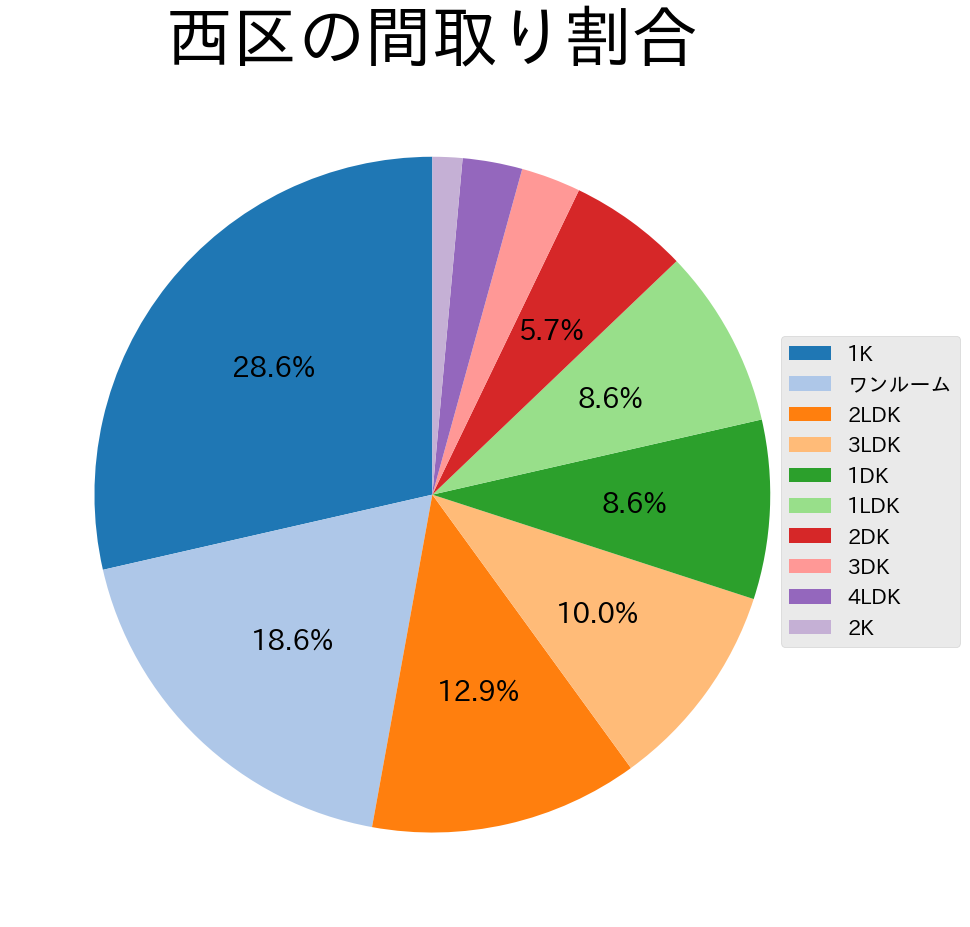

家賃の最大値 11.0
家賃の最小値 1.5
家賃の中央値 4.95
家賃の平均値 5.07


In [17]:
# 間取りの割合

# 書き込み
with open('西.csv', 'w') as csv_file:
    fieldnames = ['家賃','物件番号','情報更新日','次回更新予定日','所在地','建物名','沿線・駅・交通','専有面積','専用庭面積','間取り','間取り内訳','バルコニー','サービスルーム数'
                 ,'小学校区','中学校区','駐車場','駐車場：形式','駐車場：状況','駐車場備考','駐車場敷金','敷金','礼金','精算方式','保証金','保証金償却','管理費','共益費'
                 ,'雑費','家賃保証会社','家賃保証・保証費用等','保険','更新料','その他一時金','施設費用','その他費用','賃貸借区分','契約期間','特優賃区分','管理員の勤務形態','敷地延長','建物構造'
                 ,'建物工法','最適用途','階建','階','築年月','現況','入居可能時期','設備','特記事項','備考','取引態様','担当者','担当者連絡先','市区'] # 54
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()

df = pd.read_csv("ふれんず物件スクレイピング情報.csv")
plt.figure(figsize = (10,10))
textprops = {"fontsize":20}
df['市区'] = df['所在地'].apply(lambda x: re.split('[市区]', x)[1])
plt.style.use('ggplot')
plt.rcParams.update({'font.size':15})
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("tab20").colors)

hakata = []

count = 0

for i in range(len(df)):
    if df.loc[i]["市区"] == "西":
        hakata.append(df.loc[i])
        # 書き込み
        with open('西.csv', 'a') as csv_file:
            contents = {}
            writer = csv.writer(csv_file)
            writer.writerow(hakata[count].values)
            count+=1

df = pd.read_csv("西.csv")
plt.title('西区の間取り割合',fontsize= 48)

plt.pie(df["間取り"].value_counts(),
        textprops=textprops,
        autopct=lambda p:'{:.1f}%'.format(p) if p>=5 else '',
        startangle=90)
plt.legend(df["間取り"].value_counts().index,
           bbox_to_anchor=(0.9, 0.7))
plt.tight_layout()
plt.savefig("西区の間取り割合.png")
plt.show()
print("家賃の最大値",round(df["家賃"].max(),2))
print("家賃の最小値",round(df["家賃"].min(),2))
print("家賃の中央値",round(df["家賃"].median(),2))
print("家賃の平均値",round(df["家賃"].mean(),2))

In [11]:
# 間取りの割合
df = pd.read_csv("ふれんず物件スクレイピング情報.csv")


max_ = round(df["家賃"].max(),2)
min_ = round(df["家賃"].min(),2)
mean = round(df["家賃"].mean(),2)
medi = round(df["家賃"].median(),2)
print("平均",mean)
print("最大",max_)
print("最小",min_)
print("中央",medi)

平均 5.44
最大 45.0
最小 1.3
中央 4.9


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

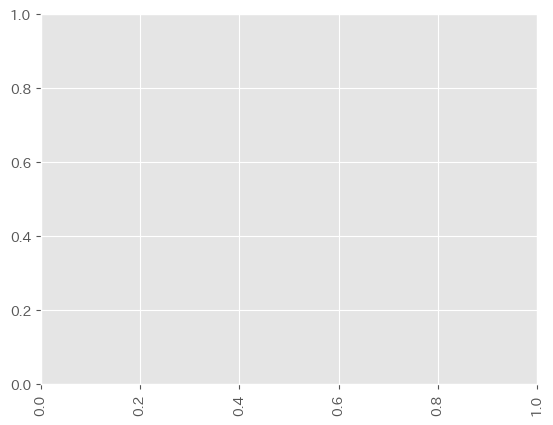

In [12]:
df = pd.read_csv("RENT.csv")
df['築年'] = df['築年月'].apply(lambda x: re.split('\[', x)[0]) 
plt.style.use('ggplot')

plt.xticks(rotation=90)
# # 散布図を描画
# plt.scatter(df["築年"].value_counts().index,df.groupby("築年").mean()["家賃"])